In [347]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [348]:
warnings.filterwarnings('ignore')

In [349]:
data = pd.read_csv("/content/HINDUNILVR.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HINDLEVER,EQ,2136.60,2300.0,2307.55,2300.00,2307.55,2307.55,2307.08,24903,5.745330e+12,NaN,NaN,NaN
1,2000-01-04,HINDLEVER,EQ,2307.55,2381.0,2381.00,2250.00,2270.00,2281.05,2298.15,58514,1.344740e+13,NaN,NaN,NaN
2,2000-01-05,HINDLEVER,EQ,2281.05,2200.0,2250.00,2105.00,2183.50,2199.90,2211.17,80296,1.775482e+13,NaN,NaN,NaN
3,2000-01-06,HINDLEVER,EQ,2199.90,2224.9,2360.00,2210.00,2300.00,2288.20,2301.80,190032,4.374157e+13,NaN,NaN,NaN
4,2000-01-07,HINDLEVER,EQ,2288.20,2300.0,2452.00,2282.25,2395.00,2412.95,2380.24,192582,4.583919e+13,NaN,NaN,NaN


In [350]:
data.drop(['Date'], axis=1, inplace=True)

In [351]:
print(data.head())
print(data.shape)
print(data.columns)

      Symbol Series  Prev Close    Open     High      Low     Last    Close  \
0  HINDLEVER     EQ     2136.60  2300.0  2307.55  2300.00  2307.55  2307.55   
1  HINDLEVER     EQ     2307.55  2381.0  2381.00  2250.00  2270.00  2281.05   
2  HINDLEVER     EQ     2281.05  2200.0  2250.00  2105.00  2183.50  2199.90   
3  HINDLEVER     EQ     2199.90  2224.9  2360.00  2210.00  2300.00  2288.20   
4  HINDLEVER     EQ     2288.20  2300.0  2452.00  2282.25  2395.00  2412.95   

      VWAP  Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  2307.08   24903  5.745330e+12     NaN                 NaN          NaN  
1  2298.15   58514  1.344740e+13     NaN                 NaN          NaN  
2  2211.17   80296  1.775482e+13     NaN                 NaN          NaN  
3  2301.80  190032  4.374157e+13     NaN                 NaN          NaN  
4  2380.24  192582  4.583919e+13     NaN                 NaN          NaN  
(5306, 14)
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', '

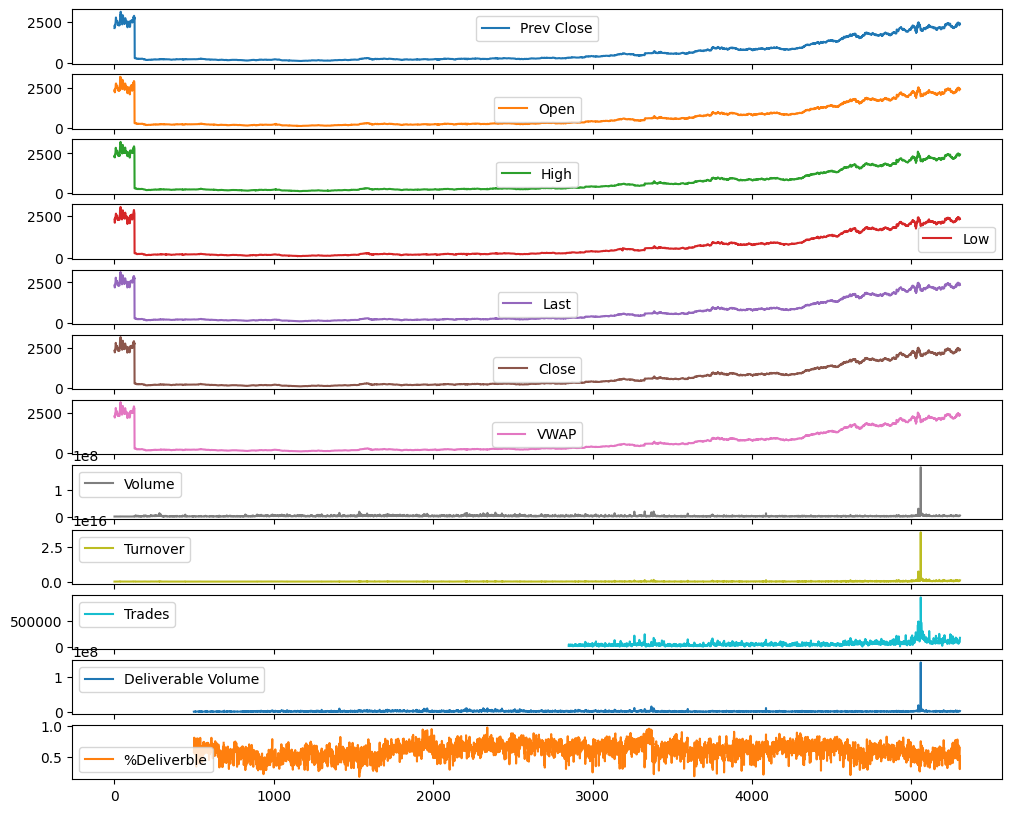

Symbol                   2
Series                   1
Prev Close            4325
Open                  3415
High                  3859
Low                   3910
Last                  3936
Close                 4326
VWAP                  5056
Volume                5301
Turnover              5306
Trades                2426
Deliverable Volume    4786
%Deliverble           2931
dtype: int64

In [352]:
data.plot(legend=True,subplots=True, figsize = (12, 10))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


In [353]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,HINDLEVER,EQ,2136.60,2300.0,2307.55,2300.00,2307.55,2307.55,2307.08,24903,5.745330e+12,NaN,NaN,NaN
1,HINDLEVER,EQ,2307.55,2381.0,2381.00,2250.00,2270.00,2281.05,2298.15,58514,1.344740e+13,NaN,NaN,NaN
2,HINDLEVER,EQ,2281.05,2200.0,2250.00,2105.00,2183.50,2199.90,2211.17,80296,1.775482e+13,NaN,NaN,NaN
3,HINDLEVER,EQ,2199.90,2224.9,2360.00,2210.00,2300.00,2288.20,2301.80,190032,4.374157e+13,NaN,NaN,NaN
4,HINDLEVER,EQ,2288.20,2300.0,2452.00,2282.25,2395.00,2412.95,2380.24,192582,4.583919e+13,NaN,NaN,NaN


          Symbol Series  Prev Close    Open     High      Low     Last  \
0      HINDLEVER     EQ     2136.60  2300.0  2307.55  2300.00  2307.55   
1      HINDLEVER     EQ     2307.55  2381.0  2381.00  2250.00  2270.00   
2      HINDLEVER     EQ     2281.05  2200.0  2250.00  2105.00  2183.50   
3      HINDLEVER     EQ     2199.90  2224.9  2360.00  2210.00  2300.00   
4      HINDLEVER     EQ     2288.20  2300.0  2452.00  2282.25  2395.00   
...          ...    ...         ...     ...      ...      ...      ...   
5301  HINDUNILVR     EQ     2307.75  2324.0  2369.80  2311.00  2367.70   
5302  HINDUNILVR     EQ     2360.65  2363.0  2386.45  2352.95  2378.00   
5303  HINDUNILVR     EQ     2379.85  2380.0  2445.00  2366.30  2404.00   
5304  HINDUNILVR     EQ     2406.55  2433.0  2448.95  2384.15  2422.15   
5305  HINDUNILVR     EQ     2407.60  2410.0  2442.90  2330.25  2350.00   

        Close     VWAP   Volume      Turnover    Trades  Deliverable Volume  \
0     2307.55  2307.08    24903 

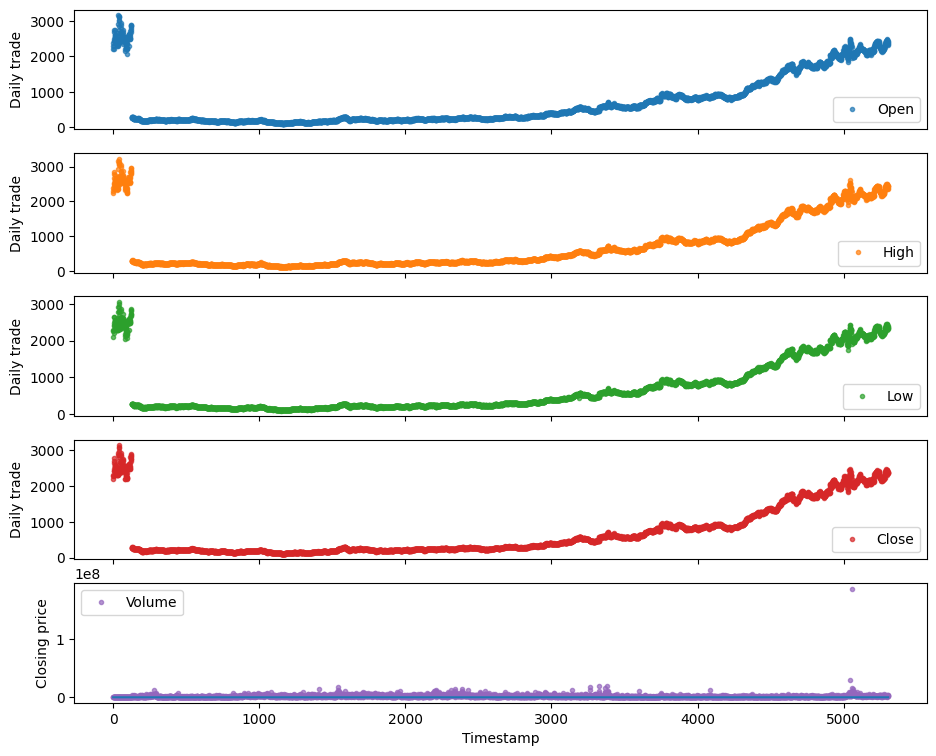

In [354]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [355]:
data.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     515
%Deliverble            515
dtype: int64

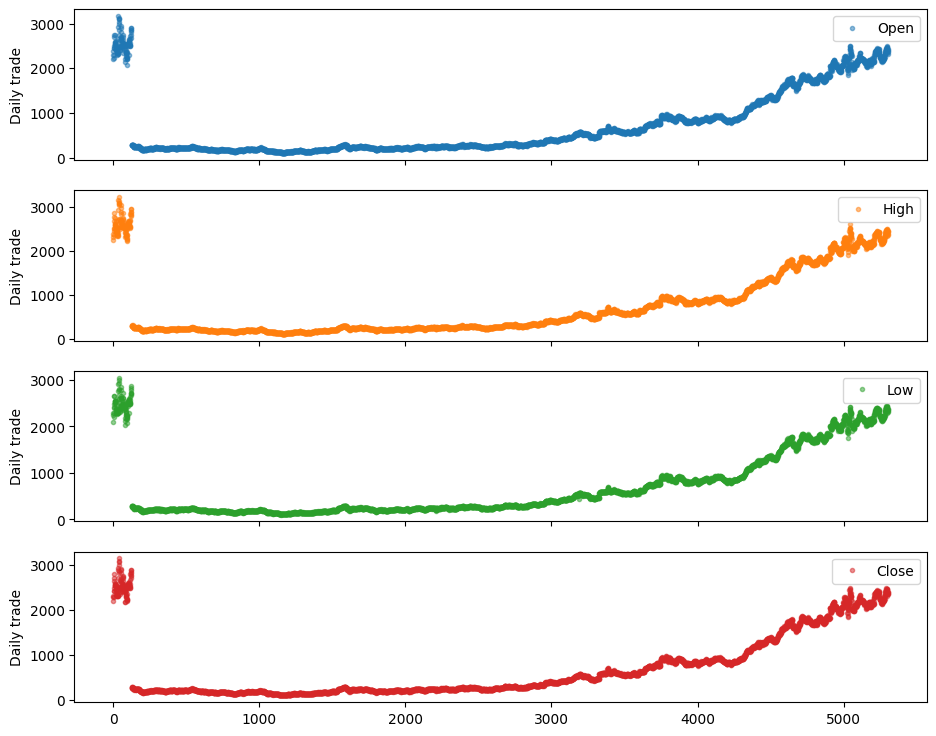

In [356]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

          Symbol Series  Prev Close    Open     High      Low     Last  \
0      HINDLEVER     EQ     2136.60  2300.0  2307.55  2300.00  2307.55   
1      HINDLEVER     EQ     2307.55  2381.0  2381.00  2250.00  2270.00   
2      HINDLEVER     EQ     2281.05  2200.0  2250.00  2105.00  2183.50   
3      HINDLEVER     EQ     2199.90  2224.9  2360.00  2210.00  2300.00   
4      HINDLEVER     EQ     2288.20  2300.0  2452.00  2282.25  2395.00   
...          ...    ...         ...     ...      ...      ...      ...   
5301  HINDUNILVR     EQ     2307.75  2324.0  2369.80  2311.00  2367.70   
5302  HINDUNILVR     EQ     2360.65  2363.0  2386.45  2352.95  2378.00   
5303  HINDUNILVR     EQ     2379.85  2380.0  2445.00  2366.30  2404.00   
5304  HINDUNILVR     EQ     2406.55  2433.0  2448.95  2384.15  2422.15   
5305  HINDUNILVR     EQ     2407.60  2410.0  2442.90  2330.25  2350.00   

        Close     VWAP   Volume      Turnover    Trades  Deliverable Volume  \
0     2307.55  2307.08    24903 

,count,mean,std,min,25%,50%,75%,max
Prev Close,5306.0,6.817590e+02,6.782624e+02,1.061500e+02,2.104125e+02,2.981000e+02,8.812125e+02,3.141250e+03
Open,5306.0,6.822949e+02,6.793402e+02,1.031000e+02,2.105000e+02,2.981500e+02,8.810250e+02,3.165700e+03
High,5306.0,6.909441e+02,6.887633e+02,1.080000e+02,2.140000e+02,3.020000e+02,8.918500e+02,3.234000e+03
Low,5306.0,6.729093e+02,6.688039e+02,1.005000e+02,2.071125e+02,2.945000e+02,8.711375e+02,3.050000e+03
Last,5306.0,6.817730e+02,6.783514e+02,1.057500e+02,2.105250e+02,2.976750e+02,8.804000e+02,3.130000e+03
Close,5306.0,6.818000e+02,6.783568e+02,1.061500e+02,2.104125e+02,2.981000e+02,8.812125e+02,3.141250e+03
VWAP,5306.0,6.818630e+02,6.786689e+02,1.063800e+02,2.104925e+02,2.981850e+02,8.805450e+02,3.166540e+03
Volume,5306.0,2.079761e+06,3.043906e+06,1.875700e+04,1.010389e+06,1.615984e+06,2.553852e+06,1.856700e+08
Turnover,5306.0,1.288699e+14,5.296064e+14,7.824905e+11,3.468311e+13,6.724330e+13,1.269755e+14,3.564334e+16
Trades,2456.0,5.625951e+04,4.819208e+04,4.590000e+02,2.899075e+04,4.387400e+04,6.790450e+04,9.467840e+05


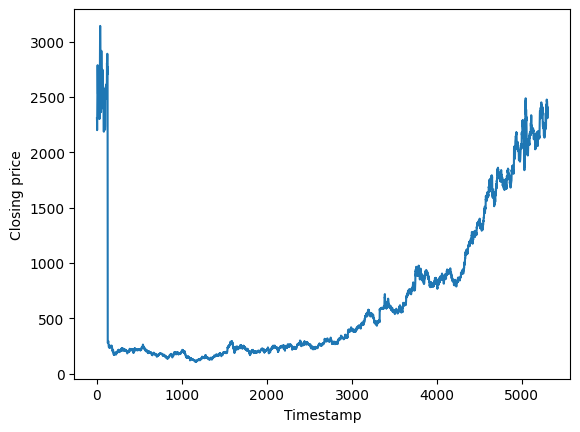

In [357]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [358]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

4163
1041


In [359]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],100 ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)

Epoch 1/100
66/66 [==============================] - 4s 13ms/step - loss: 0.0112 - mse: 0.0112 - mae: 0.0632 - val_loss: 0.0020 - val_mse: 0.0020 - val_mae: 0.0300
Epoch 2/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0280 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0265
Epoch 3/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0245 - val_loss: 0.0015 - val_mse: 0.0015 - val_mae: 0.0309
Epoch 4/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0230 - val_loss: 0.0014 - val_mse: 0.0014 - val_mae: 0.0295
Epoch 5/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0219 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0283
Epoch 6/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0211 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0272
Epoch 7/100
66/66 [==

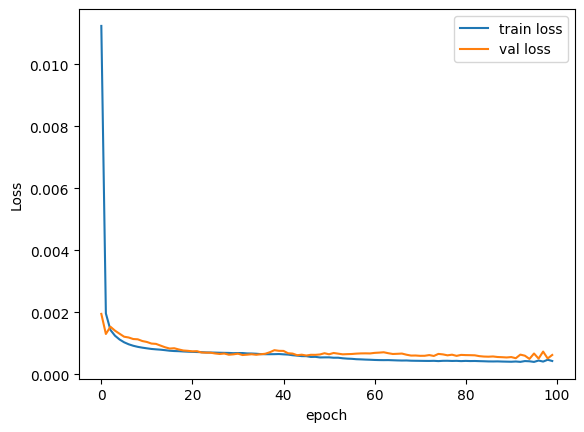

In [360]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

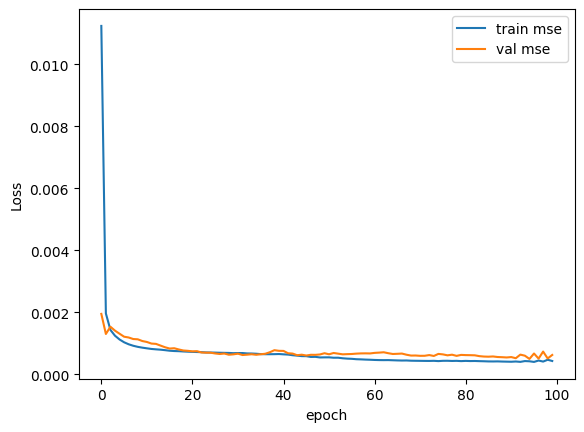

In [361]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

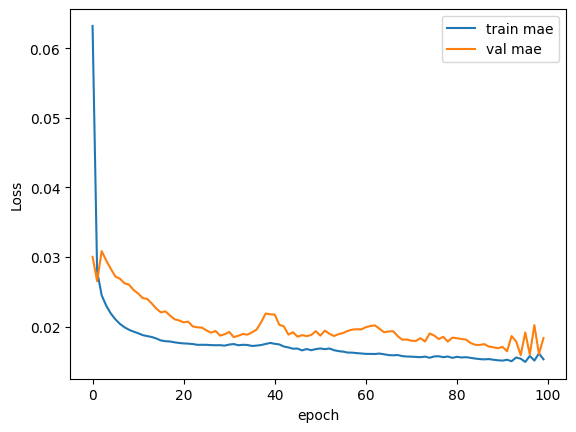

In [362]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_27 (LSTM)              (None, 32)                6272      
                                                                 
 dense_65 (Dense)            (None, 64)                2112      
                                                                 
 dense_66 (Dense)            (None, 64)                4160      
                                                                 
 activation_39 (Activation)  (None, 64)                0         
                                                                 
 dense_67 (Dense)            (None, 64)                4160      
                                                                 
 activation_40 (Activation)  (None, 64)              

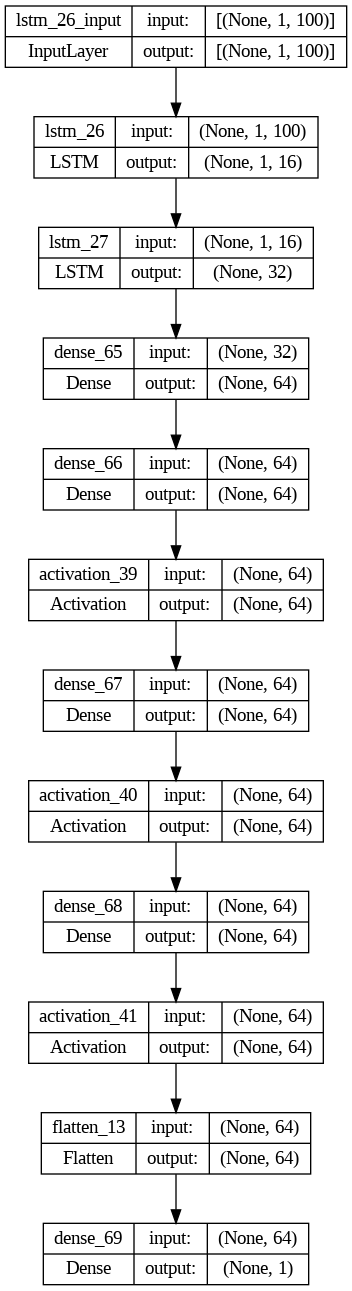

In [363]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [364]:
model.evaluate(test_X, test_Y)

33/33 [==============================] - 0s 1ms/step - loss: 6.2596e-04 - mse: 6.2596e-04 - mae: 0.0184


[0.0006259598885662854, 0.0006259598885662854, 0.018356919288635254]

In [365]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.986585
R2 Score: 0.986331
Max Error: 0.181255


33/33 [==============================] - 0s 1ms/step


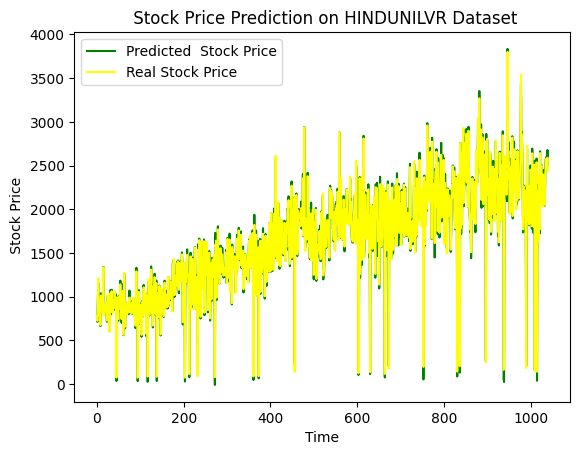

In [366]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction on HINDUNILVR Dataset')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

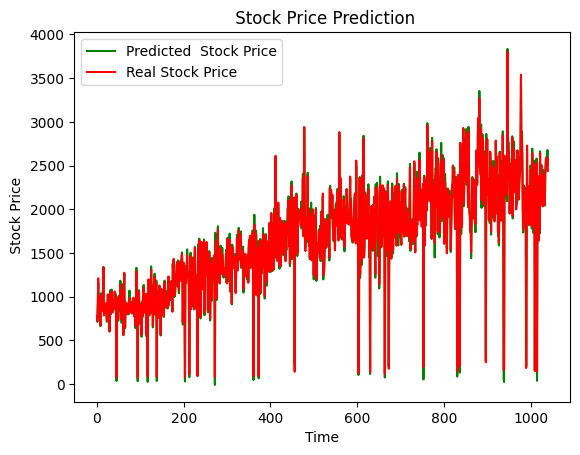

In [367]:
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [368]:
predicted

array([[ 770.7842 ],
       [ 713.2921 ],
       [ 933.73376],
       ...,
       [2515.039  ],
       [2677.9248 ],
       [2507.9316 ]], dtype=float32)

In [369]:
test_label

array([[ 776.63856528],
       [ 725.67401186],
       [ 925.11848739],
       ...,
       [2485.0266584 ],
       [2589.43198804],
       [2439.77786216]])

In [370]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_label]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

      Actual Price  Predicted Price
0       776.638565       770.784180
1       725.674012       713.292114
2       925.118487       933.733765
3      1210.671289      1157.666992
4       785.791469       773.414551
...            ...              ...
1036   2577.104049      2595.065918
1037   2566.834391      2582.566895
1038   2485.026658      2515.039062
1039   2589.431988      2677.924805
1040   2439.777862      2507.931641

[1041 rows x 2 columns]


In [371]:
from tabulate import tabulate
table = tabulate(res, headers='keys', tablefmt='pretty')
print(table)

+------+--------------------+--------------------+
|      |    Actual Price    |  Predicted Price   |
+------+--------------------+--------------------+
|  0   | 776.6385652765186  |   770.7841796875   |
|  1   | 725.6740118577076  | 713.2921142578125  |
|  2   |  925.118487394958  | 933.7337646484375  |
|  3   | 1210.671288801295  |  1157.6669921875   |
|  4   | 785.7914691943129  |  773.41455078125   |
|  5   | 927.8520559885151  | 924.4825439453125  |
|  6   |  966.309779485163  | 986.4844360351562  |
|  7   | 836.9201909959072  | 848.7496337890625  |
|  8   | 674.4539124668435  | 663.7824096679688  |
|  9   | 1014.5610992947499 |  1038.3876953125   |
|  10  | 932.9066345840539  | 934.2811889648438  |
|  11  | 833.2559241706161  |   837.2802734375   |
|  12  | 987.9260065288356  | 1018.7575073242188 |
|  13  | 982.2755203171457  |  983.939208984375  |
|  14  | 1078.7940262978916 | 1088.1124267578125 |
|  15  | 1336.2013947310163 | 1340.9010009765625 |
|  16  |  786.012097542389  |  

In [372]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_27 (LSTM)              (None, 32)                6272      
                                                                 
 dense_65 (Dense)            (None, 64)                2112      
                                                                 
 dense_66 (Dense)            (None, 64)                4160      
                                                                 
 activation_39 (Activation)  (None, 64)                0         
                                                                 
 dense_67 (Dense)            (None, 64)                4160      
                                                                 
 activation_40 (Activation)  (None, 64)              

In [373]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))